># <font color='green'> SCIPY</font>

***

**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# %matplotlib inline

# Basic

## Optimization

In [2]:
from scipy.optimize import minimize

Minimize $f(x)=(x-3)^{3}$

In [3]:
def f(x):
    return (x-3)**2

res=minimize(f,1) # parameters are function and initial guess of result

In [4]:
res # output is value of x where function 'f' is minimum

      fun: 3.2397920662551844e-16
 hess_inv: array([[0.5]])
      jac: array([-2.10976836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999998])

Minimize: $f(x,y)=(x-1)^{2}+(y-2.5)^{2}$<br>
                                        $\hspace{10cm}Where:$<br>
                                        $\hspace{10cm}x-2y+2\ge0$<br>
                                        $\hspace{10cm}-x-2y+6\ge0$<br>
                                        $\hspace{10cm}-x+2y+2\ge0$<br>
                                        $\hspace{12cm}x\ge0$<br>
                                        $\hspace{12cm}y\ge0$<br>

In [5]:
f=lambda x:(x[0]-1)**2+(x[1]-2.5)**2
cons=({'type':'ineq','fun':lambda x:x[0]-2*x[1]+2},
      {'type':'ineq','fun':lambda x:-x[0]-2*x[1]+6},
      {'type':'ineq','fun':lambda x:-x[0]+2*x[1]+2}
     )
bnds=((0,None),(0,None))
res=minimize(f,(2,0),bounds=bnds,constraints=cons)

In [6]:
res.x

array([1.4, 1.7])

In [7]:
# minimize?

***

## Interpolation

Suppose you have the following data.

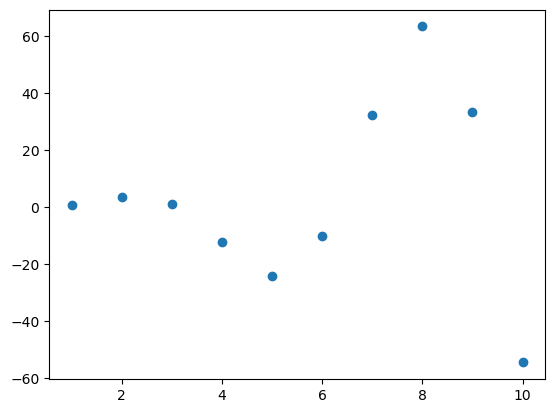

In [8]:
x=np.linspace(1,10,10)
y=x**2*np.sin(x)
plt.scatter(x,y)

- You want to know the values in between.

In [9]:
from scipy.interpolate import interp1d

In [10]:
f=interp1d(x,y,kind='cubic')
x_dense=np.linspace(1,10,100)
y_dense=f(x_dense)

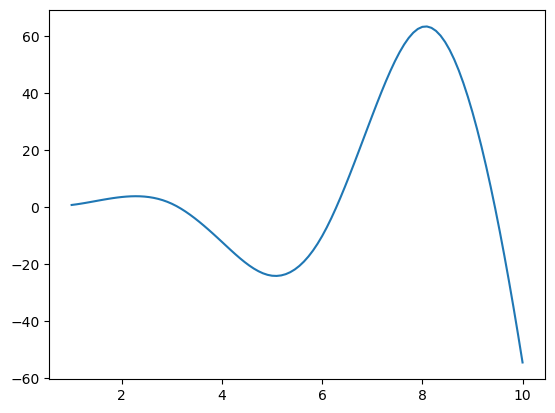

In [11]:
plt.plot(x_dense,y_dense)

***

## Curve Fitting

Trivial Example

In [12]:
x_data=np.linspace(1,10,10)
y_data=3*x_data**2+2

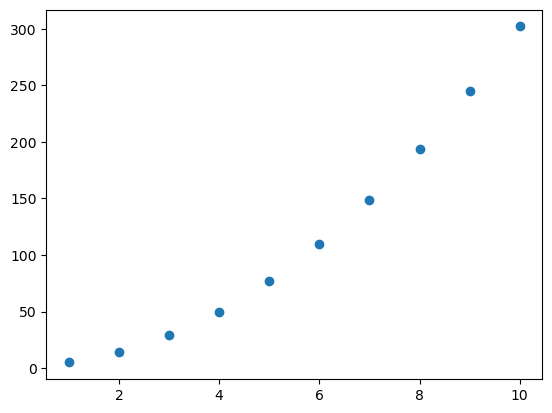

In [13]:
plt.scatter(x_data,y_data)

- Want to fit the data to the curve $y=ax^{2}+b$.
- The main goal here is to determine the values of a and b.

In [14]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x**2+b

p_opt,p_cov=curve_fit(func,x_data,y_data,p0=(1,1))

In [15]:
p_opt

array([3., 2.])

- **The equation for spring motion is $y(t)=A\cos(\omega t + \phi)$.**
- **Want to find the natural frequency of oscillation $\omega$ for the spring.**

In [16]:
x_data=np.array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ]) # This is an observed data

In [17]:
y_data=np.array([-1.66458735, -3.97707687, -2.39975153,  1.52467181,  3.95787653,
        2.52004544, -1.38253816, -3.93291821, -2.63667316,  1.23839317,
        3.90223821,  2.74946499, -1.09244655, -3.86588117, -2.85825686,
        0.94491061,  3.82389998,  2.96289048, -0.796     , -3.77635571,
       -3.06321364,  0.64593136,  3.72331754,  3.15908039, -0.494923  ,
       -3.66486262, -3.25035125,  0.34319463,  3.60107599,  3.33689344])

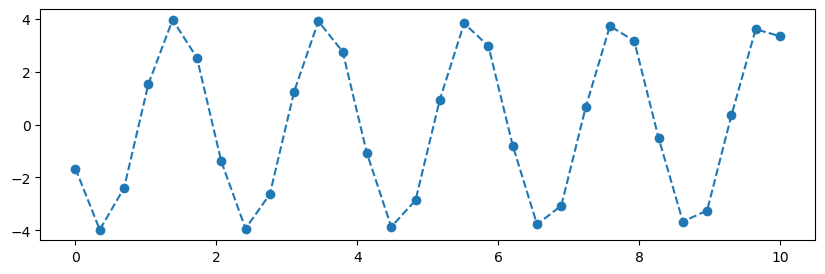

In [18]:
plt.figure(figsize=(10,3))
plt.plot(x_data,y_data,'o--')
plt.show()

In [19]:
def func(x,A,w,phi):
    return A*np.cos(w*x+phi)

p_opt,p_cov=curve_fit(func,x_data,y_data,p0=(4,np.pi,0))

In [20]:
p_opt

array([4., 3., 2.])

 So,
- $A=4$
- $\omega=3$
- $\phi =2$

- **Now we will create actual graph.**

In [21]:
A,w,phi=p_opt

In [22]:
t=np.linspace(0,10,100)
y=func(t,A,w,phi)

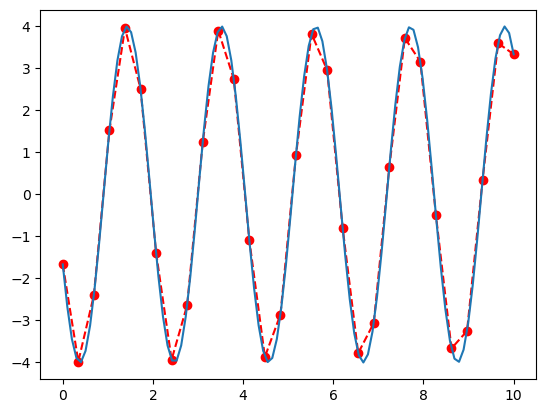

In [23]:
plt.plot(x_data,y_data,'o--r')
plt.plot(t,y)

In [24]:
p_cov # Covarience of parameters

array([[ 3.70685020e-17,  1.70683212e-19, -9.07916893e-19],
       [ 1.70683212e-19,  2.72571093e-19, -1.33578997e-18],
       [-9.07916893e-19, -1.33578997e-18,  8.91370823e-18]])

In [25]:
np.diag(p_cov) # Variance of three parameters

array([3.70685020e-17, 2.72571093e-19, 8.91370823e-18])

***

# Special Functions

Legendre Polynomials $P_{i}{x}$: satisfy $(1-x^{2})y^{"}-2xy^{'}+l(l+1)y=0$
- The angular component of the spherical Schrodinger Equation which permits non-infinite solution.

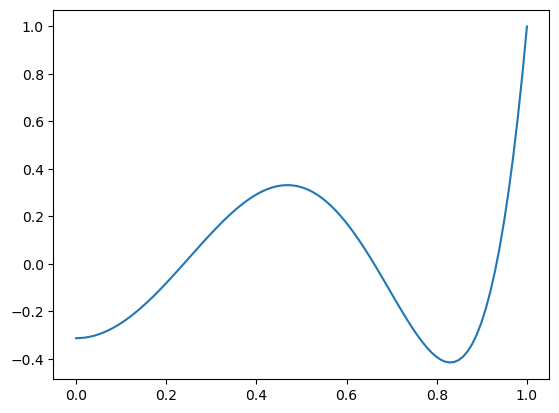

In [26]:
from scipy.special import legendre
x=np.linspace(0,1,100)
plt.plot(x,legendre(6)(x))
plt.show()

In [27]:
legendre(6)

poly1d([ 1.44375000e+01,  0.00000000e+00, -1.96875000e+01,  1.60288449e-15,
        6.56250000e+00,  0.00000000e+00, -3.12500000e-01])

In [28]:
legendre(6)(x)

array([-0.3125    , -0.31183063, -0.30982498, -0.30649042, -0.30183921,
       -0.29588849, -0.28866022, -0.28018113, -0.27048269, -0.259601  ,
       -0.24757672, -0.234455  , -0.22028534, -0.20512149, -0.18902132,
       -0.17204669, -0.1542633 , -0.13574052, -0.1165512 , -0.09677155,
       -0.07648089, -0.05576147, -0.03469823, -0.01337862,  0.00810769,
        0.02966902,  0.05121194,  0.07264159,  0.09386188,  0.11477587,
        0.135286  ,  0.15529446,  0.17470346,  0.19341564,  0.21133433,
        0.228364  ,  0.24441054,  0.25938173,  0.27318756,  0.28574066,
        0.29695673,  0.30675493,  0.31505837,  0.32179447,  0.32689553,
        0.3302991 ,  0.33194851,  0.33179336,  0.32979001,  0.3259021 ,
        0.32010106,  0.31236669,  0.30268763,  0.29106199,  0.27749789,
        0.26201403,  0.24464031,  0.22541838,  0.20440232,  0.18165921,
        0.15726978,  0.13132908,  0.1039471 ,  0.07524946,  0.04537808,
        0.01449189, -0.01723251, -0.04960009, -0.08239669, -0.11

Bessel functions $J_{\alpha}(x)$: satisfy $x^{2}y^{"}+xy^{'}+(x^{2}-\alpha^{2})y=0$
- **Laplace's Equation in Polar Coordinates**

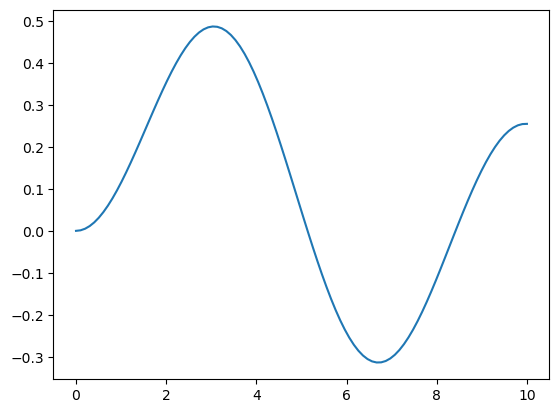

In [29]:
from scipy.special import jv
x=np.linspace(0,10,100)
plt.plot(x,jv(2,x))
plt.show()

***

# Calculas

***

## Differentiation

In [30]:
from scipy.misc import derivative

In [31]:
def f(x):
    return x**2*np.sin(2*x)*np.exp(-x)

x=np.linspace(0,1,100)

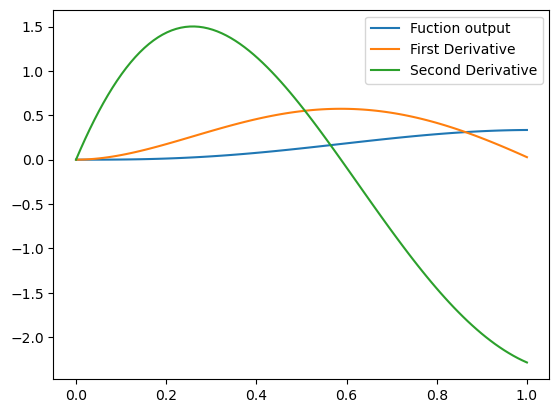

In [32]:
plt.plot(x,f(x),label='Fuction output')
plt.plot(x,derivative(f,x,dx=1e-6),label='First Derivative')
plt.plot(x,derivative(f,x,dx=1e-6,n=2),label='Second Derivative')
plt.legend()
plt.show()

## Integration

- Single Integral<br>
$\hspace{20cm} \int_{0}^{1}x^{2}\sin(2x)e^{-x}dx$

In [33]:
from scipy.integrate import quad

integrand=lambda x:x**2*np.sin(2*x)*np.exp(-x)
integral,integral_error=quad(integrand,0,1)

In [34]:
integral_error

1.6162822047366225e-15

In [35]:
integral

0.14558175869954834

- Double Integral <br>
$\hspace{20 cm} \int_{0}^{1}\int_{-x}^{x^{2}}\sin(x+y^{2})dydx$

In [36]:
from scipy.integrate import dblquad

integrand=lambda x,y:np.sin(x*y**2)
lwr_y=lambda x:-x
upr_y=lambda x:x**2
integral,integral_error=dblquad(integrand,0,1,lwr_y,upr_y)

In [37]:
integral

-0.02758236457700973

In [38]:
integral_error

4.0227617355082206e-14

***

# Differential Equations

***

### First Order ODEs

- Air Friction while falling
$\hspace{15 cm} \nu^{'}-\alpha\nu^{2}+\beta=0\hspace{2cm}\nu(0)=0$

In [39]:
from scipy.integrate import odeint

All information about differential equation

In [40]:
def dvdt(v,t):
    return 3*v**2-5
v0=0

Solve differential equation

In [41]:
t=np.linspace(0,1,100)
sol=odeint(dvdt,v0,t)

In [42]:
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

Plot

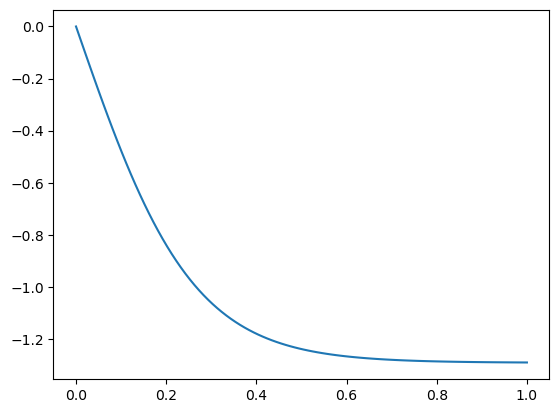

In [43]:
plt.plot(t,sol.T[0])

### Coupled first order ODEs
$\hspace{15cm}y_{1}^{'}=y_{1}+y_{2}^{2}+3x\hspace{2cm}y_{1}(0)=0$
$\hspace{15cm}y_{2}^{'}=3y_{1}+y_{2}^{3}-\cos(x)\hspace{2cm}y_{2}(0)=0$

Letting $S=(y_{1},y_{2})$ we need to write a function that returns $\frac{dS}{dx}=\left(\frac{dy_{1}}{dx},\frac{dy_{2}}{dx}\right)$.The function

In [44]:
def dSdx(S,x):
    y1,y2=S
    return [y1+y2**2+3*x,3*y1+y2**3-np.cos(x)]

y1_0=0
y2_0=0
S_0=(y1_0,y2_0)

In [45]:
x=np.linspace(0,1,100)
sol=odeint(dSdx,S_0,x)

In [46]:
sol

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914061e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076628e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [47]:
y1=sol.T[0]
y2=sol.T[1]

Text(0, 0.5, 'y')

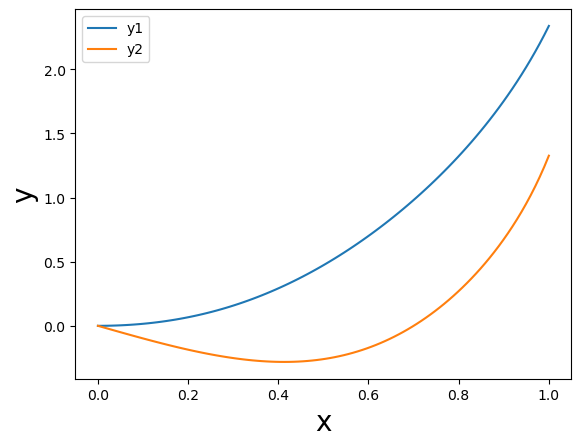

In [48]:
plt.plot(x,y1,label='y1')
plt.plot(x,y2,label='y2')
plt.legend()
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

## Second order ODEs
Equation for a pendulum
$\hspace{15 cm}\theta"-\sin(\theta)=0$<br>
<br>Scipy can only solve coupled first order ODEs,but **any second order ODE can be turned into two coupled first order ODEs.** The same thing goes for higher order ODEs.
Define $\omega=\frac{d\theta}{dt}$ so that one has the following coupled ODEs.
$\hspace{15 cm} {d\omega}/{dt}=\sin(\theta)$<br><br>
$\hspace{15 cm} {d\theta}/{dt}=\omega$<br><br>
Let $S=(\theta,\omega)$

In [49]:
def dSdt(S,t):
    theta,omega=S
    return [omega,np.sin(theta)]

theta0=np.pi/4
omega0=0
S0=(theta0,omega0)

In [50]:
t=np.linspace(0,20,100)
sol=odeint(dSdt,S0,t)
theta,omega=sol.T

In [51]:
sol.T

array([[ 0.78539816,  0.79986207,  0.84366606,  0.91802008,  1.02483987,
         1.16655539,  1.34576295,  1.56465214,  1.8241588 ,  2.12288479,
         2.4560094 ,  2.81464874,  3.18620797,  3.55597383,  3.909537  ,
         4.23509027,  4.52473432,  4.77455111,  4.98380505,  5.15382323,
         5.28695896,  5.38581128,  5.45271189,  5.48942068,  5.49696242,
         5.47555266,  5.42458391,  5.34266614,  5.22773847,  5.07729222,
         4.88876634,  4.66018347,  4.39106169,  4.08352608,  3.74333932,
         3.38035106,  3.00785089,  2.64071279,  2.29290655,  1.97537606,
         1.69503381,  1.45494359,  1.25524424,  1.09427737,  0.96957062,
         0.87855116,  0.81900266,  0.78933015,  0.78869816,  0.8170886 ,
         0.87530193,  0.96490209,  1.08808262,  1.24740867,  1.44536988,
         1.68367901,  1.96229927,  2.27831737,  2.62500044,  2.99156934,
         3.36414856,  3.72785062,  4.06927009,  4.378384  ,  4.64925393,
         4.87961502,  5.06985915,  5.2219193 ,  5.3

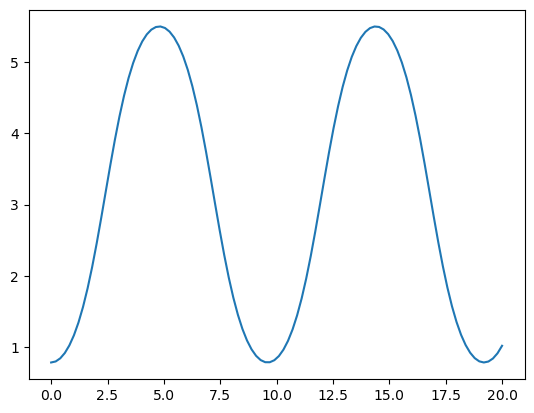

In [52]:
plt.plot(t,theta)
plt.show()

***

# Fourier Transforms

The discrete Fourier transform is defined as,
$\hspace{15cm}y[k]=\sum_{n=0}^{N-1}e^{-2\pi i(k/N)}x[n]$
<br><br>
- k/N represents a specific frequency (dimensionless).
- can be converted to a frequency "Hz" if you know the spacing in x.

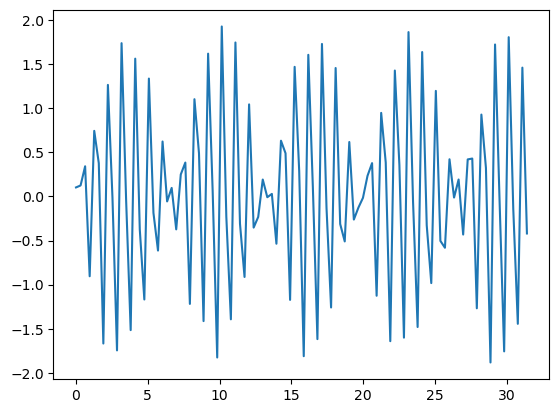

In [53]:
t=np.linspace(0,10*np.pi,100)
x=np.sin(2*np.pi*t)+np.sin(4*np.pi*t)+0.1*np.random.randn(len(t))
plt.plot(t,x)

In [54]:
from scipy.fft import fft, fftfreq
N=len(x)
y=fft(x)[:N//2]
f=fftfreq(N,np.diff(t)[0])[:N//2]

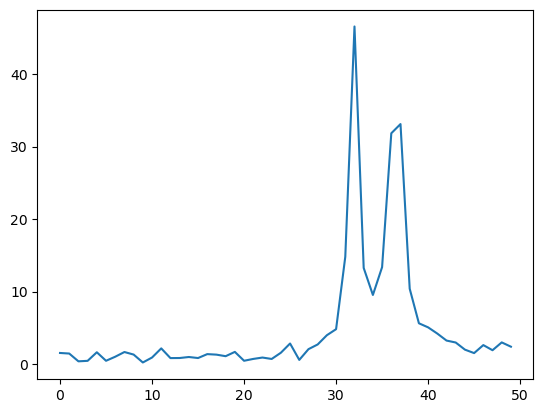

In [55]:
plt.plot(np.abs(y))

# Examples
**Example 1.** The energy required to get from point $\vec{r_{1}}$ to point $\vec{r_{2}}$ for a plane is given by<br><br><br>
$\hspace{15 cm} E=\alpha\int_{c}\left|\frac{d\vec{r}}{dt}\right|dt-\int_{c}\vec{F}\frac{d\vec{r}}{dt}dt$<br><br><br>
Suppose that $\alpha=5$ and our start and end points are $\vec{r_{1}}=(0,0)$ and $\vec{r_{2}}=(0,10)$. On this particular day, the wind produces a force field $\vec{F}=(0,-2/(x+1)^2)$.Find the optimal value of $A$ in $\vec{r}(t)=A\sin(\pi t/10)\hat{x}+t\hat{y}$<br><br>
Then $x=A\sin(\pi t/10),y=t$, and<br><br><br>

$\hspace{10 cm} \left|\frac{d\vec{r}}{dt}\right|=\sqrt{1+(\pi A/10)^{2}\cos^{2}(\pi t/10)}$,<br><br><br>
$\hspace{10 cm} \vec{F}.\frac{d\vec{r}}{dt}=\begin{bmatrix} 0\\{-2/(A \sin(\pi t/10)+1)^2}\end{bmatrix}.\begin{bmatrix}\pi A/10 \cos(\pi t/10)\\1\end{bmatrix}=-2(A\sin(\pi t/10)+1)^2$<br><br><br>
So that,<br><br><br>
$\hspace{10 cm} E=\int_{0}^{10}\left(5\sqrt{1+(\pi A/10)^2\cos^2(\pi t/10)}+\frac{2}{(A\sin(\pi t/10)+100)^2}\right)dt$

In [56]:
def f(A):
    integrand= lambda t:2/(1+np.abs(A*np.sin(np.pi*t/10)))**2+5*np.sqrt(1+(np.pi*A/10)**2*np.cos(np.pi*t/10)**2)
    return quad(integrand,0,10)[0]

minimize(f,0.001).x

array([1.42591114])

**Example 2.** Newton's law of cooling is <br><br><br>

$\hspace{10cm} \frac{dT}{dt}=-k(T-T_{2}(t))$<br><br><br>

Where $T$ is the temperature of an object in the surroundings with temperature $T_{1}(t)$ (which may depend on time). Suppose $T$ represents the temperature of a shallow pool of water and $T_{1}(t)$ represents the temperature of outside. Find $T(t)$ given that you collected measurements of the outside:

In [57]:
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature [K]')

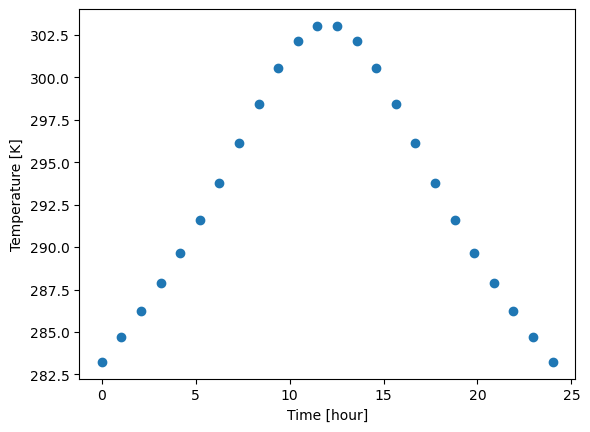

In [58]:
plt.scatter(t_m,temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [59]:
Ts=interp1d(t_m,temp_m,kind='cubic')

In [60]:
def dTdt(T,t):
    return -0.5*(T-Ts(t))

times=np.linspace(1,23,100)
T0=284

In [61]:
sol=odeint(dTdt,T0,times).T[0]

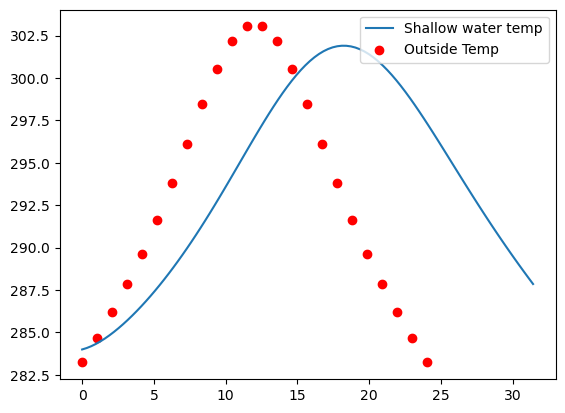

In [62]:
plt.plot(t,sol,label='Shallow water temp')
plt.scatter(t_m,temp_m,color='r',label='Outside Temp')
plt.legend(loc='upper right')

***

# Linear Algebra

***

## Basics

Tringular matrix

$\hspace{10cm}\begin{bmatrix}3 & 0 & 0 & 0\\ 2 & 1 & 0 & 0\\1 & 0 & 1 & 0\\1 & 1 & 1 & 1\end{bmatrix}\vec{x}=\begin{bmatrix}4\\2\\4\\2\end{bmatrix}$

In [63]:
from scipy.linalg import solve_triangular

a=np.array([[3,0,0,0],
            [2,1,0,0],
            [1,0,1,0],
            [1,1,1,1]])
b=np.array([4,2,4,2])

x=solve_triangular(a,b,lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

- Toepllitz Matrices (matrices with constant diagonals)

$\hspace{10cm}\begin{bmatrix}1 & -1 & 2 & 3\\ 3 & 1 & -1 & 2\\6 & 3 & 1 & -1\\10 & 6 & 3 & 1\end{bmatrix}\vec{x}=\begin{bmatrix}1\\2\\2\\5\end{bmatrix}$

In [64]:
from scipy.linalg import solve_toeplitz,toeplitz

c=np.array([1,3,6,10]) # First column of T
r=np.array([1,-1,-2,-3]) # First row of T
b=np.array([1,2,2,5])

x=solve_toeplitz((c,r),b)

# Eigenvalue Problems

***

- Eigen-value problems can be solved using Numpy, so here we foucus on particular cases for optimization

In [65]:
from scipy.linalg import eigh_tridiagonal

$\hspace{10cm}\begin{bmatrix}3 & -1 & 0 & 0\\ -1 & 3 & -1 & 0\\0 & -1 & 3 & -1\\0 & 0 & -1 & 3\end{bmatrix}\vec{x}=\lambda x$

In [66]:
d=3*np.ones(4)
e=-1*np.ones(3)
w,v=eigh_tridiagonal(d,e)

In [67]:
v.T

array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [-0.37174803,  0.60150096, -0.60150096,  0.37174803]])

In [68]:
v.T[0]

array([0.37174803, 0.60150096, 0.60150096, 0.37174803])

In [69]:
A=np.diag(d)+np.diag(e,k=-1)+np.diag(e,k=1)

In [70]:
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [71]:
A@v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [72]:
w[1]*v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [73]:
w[1]

2.3819660112501047

***

# Special Matrices

- Fiedler matrix $A_{ij}=|a_{i}-a_{j}|$ where $a_{i}$ is some sequence of numbers

In [74]:
from scipy.linalg import fiedler
fiedler([1,4,12,45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

- Toeplitz matrices (matrices with constant diagonals)

In [75]:
from scipy.linalg import toeplitz
toeplitz([1,2,3,6,0,0],[1,4,5,6,0,0])

array([[1, 4, 5, 6, 0, 0],
       [2, 1, 4, 5, 6, 0],
       [3, 2, 1, 4, 5, 6],
       [6, 3, 2, 1, 4, 5],
       [0, 6, 3, 2, 1, 4],
       [0, 0, 6, 3, 2, 1]])

# Decompositions

- LU decomposition $A=PLU$ where $P$ is permutation matrix, $L$ is a lower triangular matrix and $U$ is a upper triangular matrix.

In [76]:
from scipy.linalg import lu
A=np.array([[2,5,7,8],[5,2,2,8],[7,5,6,6],[5,4,4,8]])

In [77]:
p,l,u=lu(A)

In [78]:
p

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [79]:
l

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.28571429,  1.        ,  0.        ,  0.        ],
       [ 0.71428571,  0.12      ,  1.        ,  0.        ],
       [ 0.71428571, -0.44      , -0.04347826,  1.        ]])

In [80]:
u

array([[ 7.        ,  5.        ,  6.        ,  6.        ],
       [ 0.        ,  3.57142857,  5.28571429,  6.28571429],
       [ 0.        ,  0.        , -0.92      ,  2.96      ],
       [ 0.        ,  0.        ,  0.        ,  6.60869565]])

- Choleski decomposition: find matrix $C$ such that $A=CC^{T}$

In [81]:
from scipy.linalg import cholesky
A=np.array([[1,0.2],[0.2,1]])
C=cholesky(A,lower=True)

## Sparse Matrices

- Matrices that contain lots of zeros (so lots of space can be reduced)

**A Useful Example:**
    
The second derivative of $f(x_{i})=f_{i}$ is approximated as $\frac{d^{2}f_{i}}{dx^{2}}\thickapprox\frac{f_{i-1}+f_{i+1}-2f_{i}}{\Delta x^{2}}$, Suppose we have $f_{0}.....f_{4}$ and $f_{0}=f_{4}=0$ (boundary conditions). Then the second derivative is approximated as <br>

$\hspace{10 cm}D\begin{bmatrix}f_{1} \\f_{2}\\f_{3}\\f_{4}\end{bmatrix}\hspace{2cm}D=\frac{1}{x^{2}}\begin{bmatrix}-2 & 1&0\\1 & -2 & 1\\0 & 1 & -2\end{bmatrix}$<br><br>

In 2D our functin can be discretized on grid

$\hspace{10 cm}\begin{bmatrix}0 & 0 & 0 & 0 & 0\\0 & f_{11} & f_{11} & f_{12} & 0 \\0 & f_{21} & f_{22} & f_{23} & 0 \\0 & f_{31} & f_{32} & f_{33} & 0 \\0 & 0 & 0 & 0 & 0\end{bmatrix}$<br><br>

When doing this kind of work,it's always better to store information in a vector

$\hspace{10 cm}\begin{bmatrix}0 & 0 & 0 & 0 & 0\\0 & f_{11} & f_{11} & f_{12} & 0 \\0 & f_{21} & f_{22} & f_{23} & 0 \\0 & f_{31} & f_{32} & f_{33} & 0 \\0 & 0 & 0 & 0 & 0\end{bmatrix}\rightarrow\begin{bmatrix}f_{11} \\ f_{11} \\ f_{12}\\f_{21} \\ f_{22} \\ f_{23}\\f_{31} \\ f_{32} \\ f_{33}\end{bmatrix}$<br><br>

What does 2D laplacian looks like?
It turn out it is the "Kroncker Sum" of our original matrix. The second derivative is given by

$\hspace{10 cm}(D\oplus D)\begin{bmatrix}f_{11} \\ f_{11} \\ f_{12}\\f_{21} \\ f_{22} \\ f_{23}\\f_{31} \\ f_{32} \\ f_{33}\end{bmatrix}\hspace{2cm} D=\frac{1}{x^{2}}\begin{bmatrix}-2 & 1 & 0\\1 & -2 & 1\\0 & 1 & -2\end{bmatrix}$<br><br>

Note that even though $D$ is 3x3. $(D\oplus D)$ is 9x9.

In [82]:
from scipy.linalg import kron #kronecker product, not sum

N=5
d=-2*np.ones(N)
e=np.ones(N-1)
D=np.diag(d)+np.diag(e,k=1)+np.diag(e,k=-1)
D_kronsum=kron(D,np.identity(N))+kron(np.identity(N),D)

Too big for any reasonable calculation! But we can use sparse matrices

In [83]:
from scipy import sparse

N=100
diag=np.ones([N])
diags=np.array([diag,-2*diag,diag])
D=sparse.spdiags(diags,np.array([-1,0,1]),N,N)

In [84]:
sparse.kronsum(D,D)

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

***

# Statistics

**Example 1 : $\beta$ distribution**


$\hspace{10 cm}f(x;a,b)=\frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma (a)\Gamma (b)}\hspace{2cm}0\le x\le 1$

In [85]:
from scipy.stats import beta

Basic Statistics

In [86]:
a,b=2.5,3.1
mean,var,skew,kurt=beta.stats(a,b,moments='mvsk')

Probability Distribution Plotting:

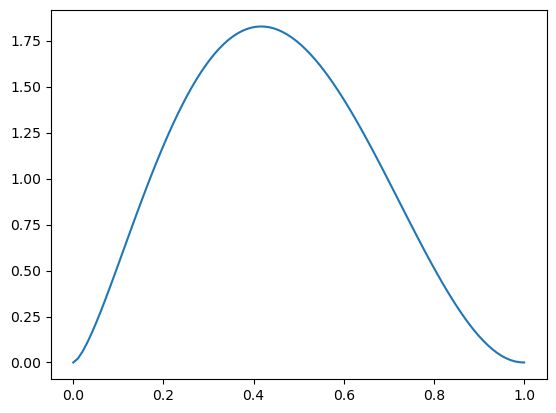

In [87]:
x=np.linspace(beta.ppf(0,a,b),beta.ppf(1,a,b),100)
plt.plot(x,beta.pdf(x,a,b))

**Example 2: Gaussian Distribution**
    
$\hspace{10 cm} f(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^{2}}}exp\left(-\frac{(x-\mu)^{2}}{\sigma^{2}}\right)\hspace{2 cm}-\infty< x< \infty$

In [88]:
from scipy.stats import norm

In [89]:
mu=1
sigma=2
mean,var=norm.stats(loc=mu,scale=sigma,moments='mv')

In [90]:
mean

array(1.)

In [91]:
var

array(4.)

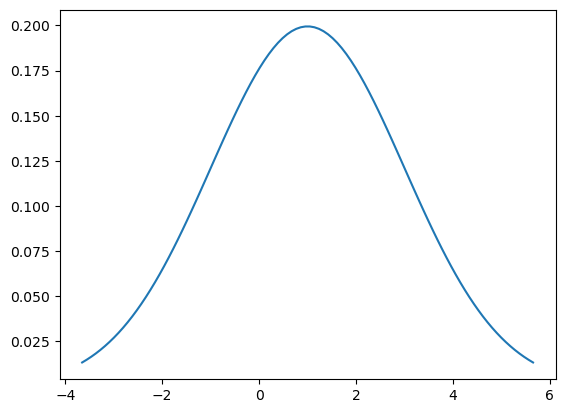

In [92]:
x=np.linspace(norm.ppf(0.01,mu,sigma),norm.ppf(0.99,mu,sigma),100)
plt.plot(x,norm.pdf(x,mu,sigma))

**Example 3: Multinomial Distribution**
    
$\hspace{10 cm}f(x_{1},x_{2},......x_{k};p_{1},p_{2},.....p_{k},n)=\frac{n!}{x_{1}!....x_{k}!}p_{1}^{x_{1}}p_{2}^{x_{2}}....p_{k}^{x_{k}}$

Rolling a dice...

In [93]:
from scipy.stats import multinomial

p=np.ones(6)/6
multinomial.pmf([6,0,0,0,0,0],n=6,p=p) # getting one side 6 times and all other 0 times when dice is rolled 6 times

2.143347050754453e-05

In [94]:
multinomial.rvs(n=100,p=p,size=5) # generating random output for 100 time dice roll total 5 times (5x100)

array([[16, 20, 15, 13, 21, 15],
       [18, 17, 16, 20, 16, 13],
       [24, 16, 17, 16, 15, 12],
       [13, 15, 18, 18, 22, 14],
       [20, 15, 17, 16, 14, 18]])